In [39]:
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [40]:
#import input and output data
#input data (X)
df1 = pd.read_csv("X_breast_data.csv")
#output data (Y)
df2 = pd.read_csv("Y_breast_data.csv")

In [41]:
#visualize values
df1.head()

,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [42]:
df2.head()

,1
0,1
1,1
2,1
3,1
4,1


In [43]:
print(df1.shape)
print(df2.shape)

(568, 30)
(568, 1)


In [44]:
df1.describe()

,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [45]:
df2.describe()

,1
count,568.000000
mean,0.371479
std,0.483626
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [46]:
#identifying whether there're null values.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   17.99     568 non-null    float64
 1   10.38     568 non-null    float64
 2   122.8     568 non-null    float64
 3   1001      568 non-null    float64
 4   0.1184    568 non-null    float64
 5   0.2776    568 non-null    float64
 6   0.3001    568 non-null    float64
 7   0.1471    568 non-null    float64
 8   0.2419    568 non-null    float64
 9   0.07871   568 non-null    float64
 10  1.095     568 non-null    float64
 11  0.9053    568 non-null    float64
 12  8.589     568 non-null    float64
 13  153.4     568 non-null    float64
 14  0.006399  568 non-null    float64
 15  0.04904   568 non-null    float64
 16  0.05373   568 non-null    float64
 17  0.01587   568 non-null    float64
 18  0.03003   568 non-null    float64
 19  0.006193  568 non-null    float64
 20  25.38     568 non-null    float6

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       568 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [48]:
#scale input data - bring all data to similar scale
df1 = preprocessing.scale(df1)

In [49]:
#split input into training and testing as well as output
#splitting with 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [53]:
#define a sequence of layers
model = Sequential()
#an arbritary amount of neurons (15), input_shape = no of features, relu performs more better than relu for hidden layers
model.add(Dense(15, input_shape=(30,), activation='relu'))
#output layer must be sigmoid cuz it needs to classify between 2 classes (0 or 1 - benign or malignant)
#we use only 1 neuron cuz it will only have one final output (1 or 0)
model.add(Dense(1, activation='sigmoid'))

#compile model - binary classification problem (2 class problem)
#adam is an on optimizer than combines both momentum and
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [54]:
#early stopping monitors the training epochs and stops the training b4 any overfitting
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

#train model for 2000 epochs
history = model.fit(X_train, y_train, epochs=2000, validation_split=0.15, verbose=1, callbacks=[earlystopper])

history_performance = history.history

Epoch 1/2000
13/13 [==============================] - 0s 30ms/step - loss: 1.0544 - accuracy: 0.2078 - val_loss: 0.9227 - val_accuracy: 0.3623
Epoch 2/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.8067 - accuracy: 0.4156 - val_loss: 0.7176 - val_accuracy: 0.5942
Epoch 3/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6675 - val_loss: 0.5756 - val_accuracy: 0.7246
Epoch 4/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.5260 - accuracy: 0.8078 - val_loss: 0.4815 - val_accuracy: 0.8261
Epoch 5/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4537 - accuracy: 0.8701 - val_loss: 0.4216 - val_accuracy: 0.8551
Epoch 6/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.4001 - accuracy: 0.9013 - val_loss: 0.3710 - val_accuracy: 0.9130
Epoch 7/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.3551 - accuracy: 0.9169 - val_loss: 0.3255 - val_accuracy: 0.9275
Epoch

13/13 [==============================] - 0s 4ms/step - loss: 0.0797 - accuracy: 0.9740 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 59/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9740 - val_loss: 0.0419 - val_accuracy: 1.0000
Epoch 60/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9740 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 61/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0773 - accuracy: 0.9740 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 62/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9740 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 63/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 0.9740 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 64/2000
13/13 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9740 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 65/2000

<Figure size 432x288 with 0 Axes>

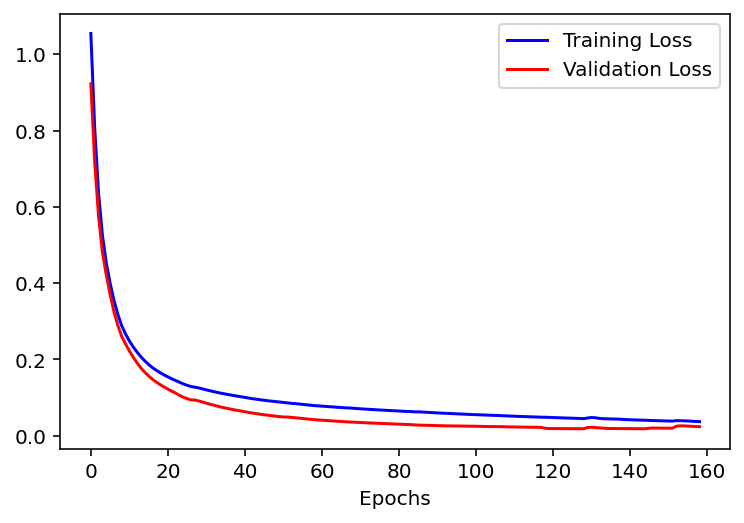

In [55]:
#Visualize loss
loss = history_performance['loss']
val_loss = history_performance['val_loss']
plt.figure()
plt.figure()
plt.xlabel("Epochs")
plt.plot(loss, 'b', label="Training Loss")
plt.plot(val_loss, 'r', label="Validation Loss")
plt.legend()

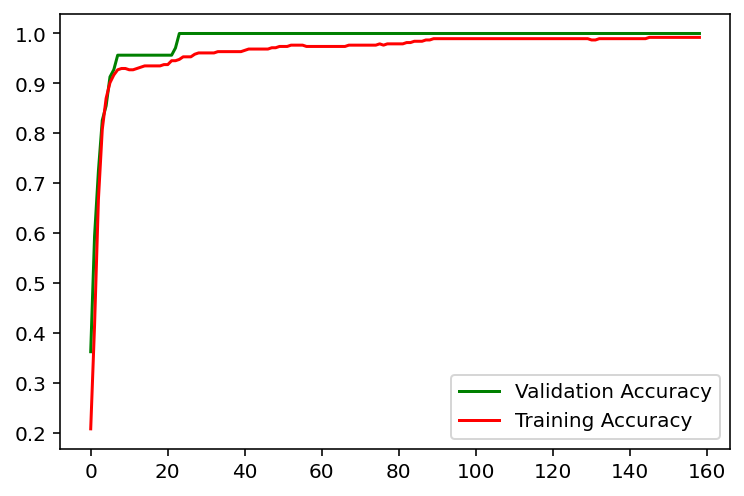

In [56]:
#Visualize Accuracy
accuracy = history_performance['accuracy']
val_accuracy = history_performance['val_accuracy']
plt.plot(val_accuracy, '-g', label="Validation Accuracy")
plt.plot(accuracy, '-r', label="Training Accuracy")
plt.legend()

In [57]:
#calculate loss and accuracy of testing data
#correct/total
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9737
Test Loss: 0.08497351408004761
Test Accuracy: 0.9736841917037964
